In [1]:
import pandas as pd

In [2]:
data_frame=pd.read_csv('dataset.csv')

In [4]:
data_frame.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [5]:
# Descriptive statistics for numerical features
numerical_features = ['age', 'day', 'mon', 'dur', 'num_calls']
descriptive_stats = data_frame[numerical_features].describe()
print(descriptive_stats)

                age           day           dur     num_calls
count  45211.000000  45211.000000  45211.000000  45211.000000
mean      40.936210     15.806419    258.163080      2.763841
std       10.618762      8.322476    257.527812      3.098021
min       18.000000      1.000000      0.000000      1.000000
25%       33.000000      8.000000    103.000000      1.000000
50%       39.000000     16.000000    180.000000      2.000000
75%       48.000000     21.000000    319.000000      3.000000
max       95.000000     31.000000   4918.000000     63.000000


In [10]:
# Frequency distribution for categorical features
categorical_features = ['job', 'marital', 'education_qual', 'prev_outcome']
# Create an empty DataFrame to hold the frequency distributions
frequency_df = pd.DataFrame()

# Loop through each categorical feature and calculate value counts
for feature in categorical_features:
    frequency_df[feature] = data_frame[feature].value_counts()

# Display the frequency distributions side by side in tabular form
print(frequency_df)

                job  marital  education_qual  prev_outcome
job                                                       
blue-collar    9732      NaN             NaN           NaN
management     9458      NaN             NaN           NaN
technician     7597      NaN             NaN           NaN
admin.         5171      NaN             NaN           NaN
services       4154      NaN             NaN           NaN
retired        2264      NaN             NaN           NaN
self-employed  1579      NaN             NaN           NaN
entrepreneur   1487      NaN             NaN           NaN
unemployed     1303      NaN             NaN           NaN
housemaid      1240      NaN             NaN           NaN
student         938      NaN             NaN           NaN
unknown         288      NaN          1857.0       36959.0


In [11]:
# Check for missing values
missing_values = data_frame.isnull().sum()
print("Missing values:\n", missing_values)
# Impute missing values
data_frame['prev_outcome'].fillna(data_frame['prev_outcome'].mode()[0], inplace=True)
data_frame['age'].fillna(data_frame['age'].median(), inplace=True)

Missing values:
 age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64


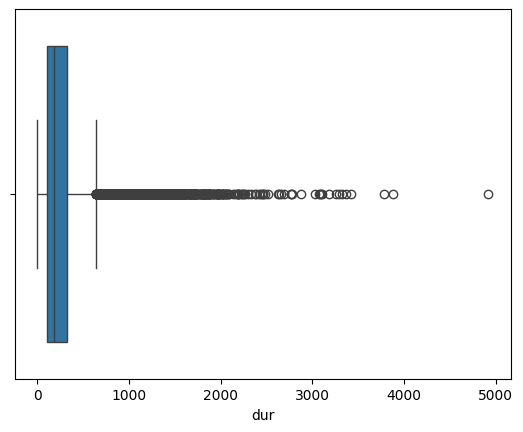

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Detect outliers using boxplots
sns.boxplot(x=data_frame['dur'])
plt.show()

# Remove outliers using IQR method
Q1 = data_frame['dur'].quantile(0.25)
Q3 = data_frame['dur'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = 1.5 * IQR

# Cap outliers
data_frame['dur'] = data_frame['dur'].clip(lower=Q1 - outlier_threshold, upper=Q3 + outlier_threshold)

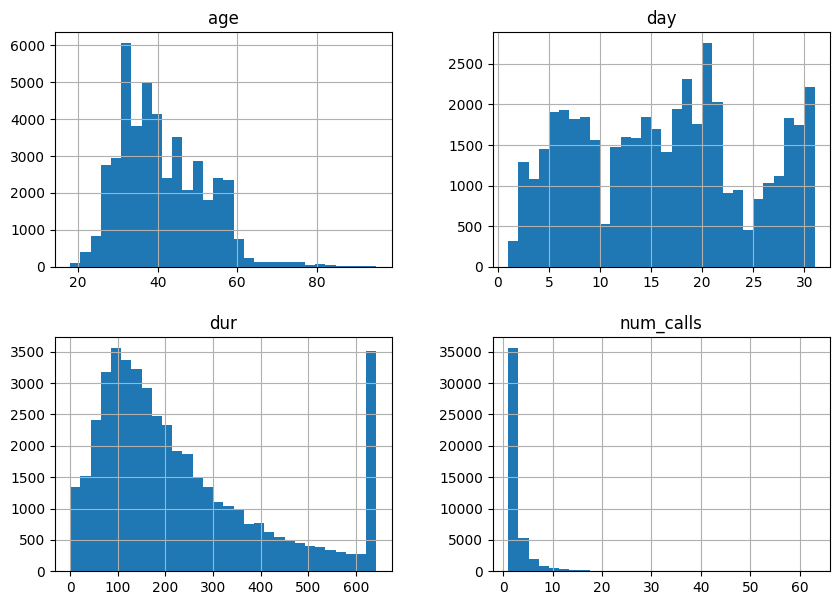

In [13]:
# Histogram for numerical features
data_frame[numerical_features].hist(bins=30, figsize=(10, 7))
plt.show()

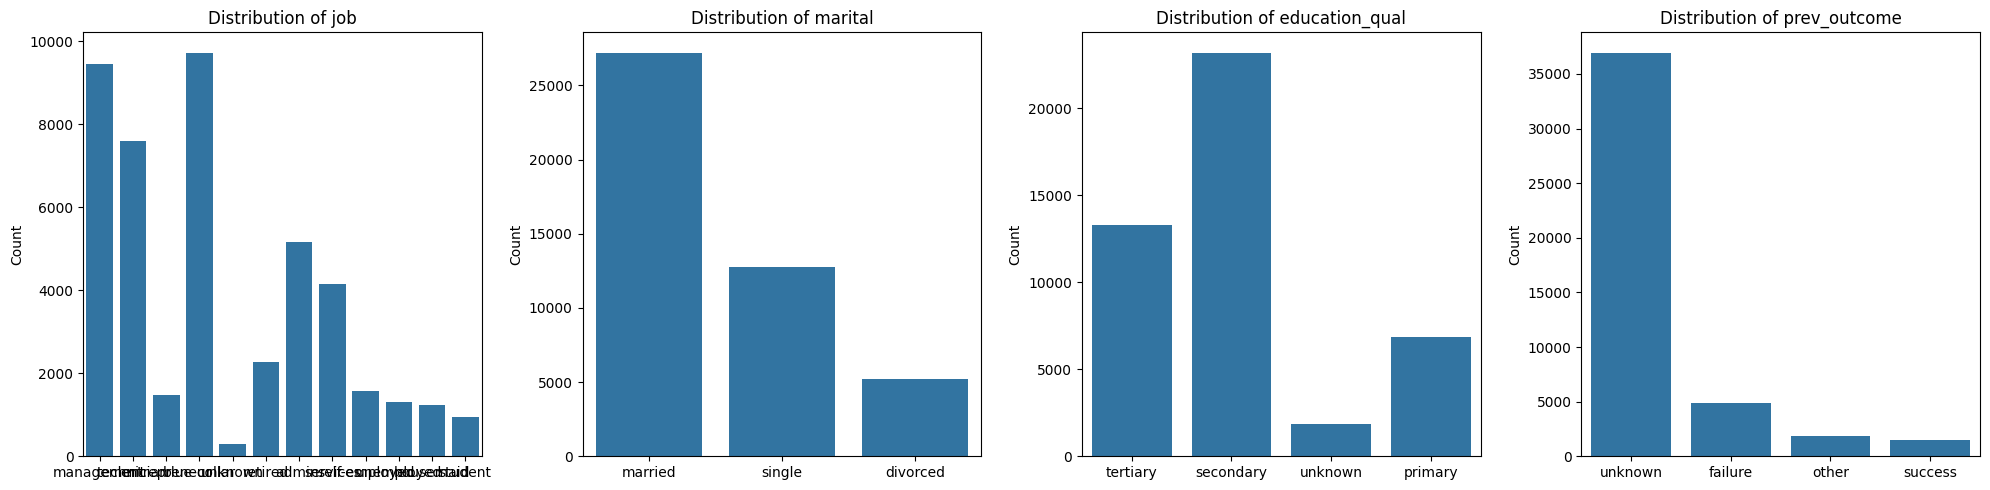

In [15]:
# Set up the figure and axes for subplots
num_features = len(categorical_features)
fig, axes = plt.subplots(nrows=1, ncols=num_features, figsize=(20, 5))

# Plot each feature in its respective subplot
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=data_frame, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

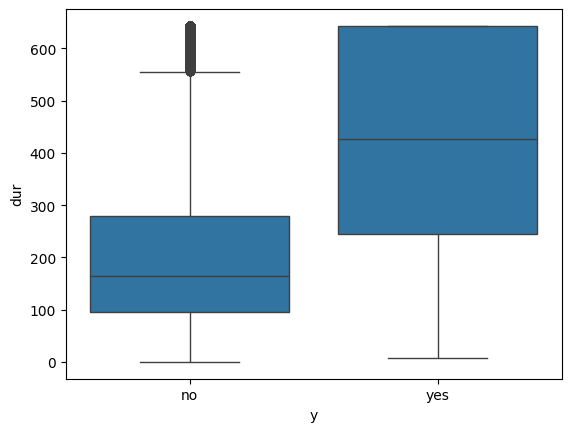

In [16]:
# Scatter plot between call duration and target variable
sns.boxplot(x='y', y='dur', data=data_frame)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data_frame.drop('y', axis=1),
    data_frame['y'],
    test_size=0.3,
    random_state=42
)

In [18]:
X_train.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome
10747,36,technician,single,tertiary,unknown,17,jun,153,4,unknown
26054,56,entrepreneur,married,secondary,cellular,19,nov,312,3,unknown
9125,46,blue-collar,married,secondary,unknown,5,jun,83,2,unknown
41659,41,management,divorced,tertiary,cellular,1,oct,302,1,success
4443,38,blue-collar,married,secondary,unknown,20,may,90,1,unknown


In [19]:
# Stratified splitting to maintain the proportion of classes
X_train, X_test, y_train, y_test = train_test_split(
    data_frame.drop('y', axis=1),
    data_frame['y'],
    test_size=0.3,
    random_state=42,
    stratify=data_frame['y']
)

In [20]:
X_train.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome
13382,31,services,married,secondary,cellular,9,jul,82,1,unknown
32641,35,services,married,secondary,cellular,17,apr,203,1,unknown
3991,24,blue-collar,single,secondary,unknown,16,may,236,2,unknown
8068,35,blue-collar,married,secondary,unknown,2,jun,579,2,unknown
27484,37,services,single,secondary,cellular,21,nov,197,2,failure


In [35]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Mapping 'mon' column (months)
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
data_frame['mon'] = data_frame['mon'].map(month_mapping)

# Encode binary target variable 'y'
data_frame['y'] = label_encoder.fit_transform(data_frame['y'])  # 'yes' -> 1, 'no' -> 0

# Encode other categorical columns
categorical_columns = ['job', 'marital', 'education_qual', 'call_type', 'prev_outcome']
for col in categorical_columns:
    data_frame[col] = label_encoder.fit_transform(data_frame[col])

# Now split the data into features and target
X = data_frame.drop('y', axis=1)  # Features
y = data_frame['y']               # Target variable

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Initialize and train the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [39]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the random forest model
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
import numpy as np
# Feature importance in Logistic Regression is given by the model coefficients
feature_importance_log_reg = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.abs(log_reg.coef_[0])
}).sort_values(by='Importance', ascending=False)

print("Logistic Regression Feature Importance:")
print(feature_importance_log_reg)

Logistic Regression Feature Importance:
          Feature  Importance
4       call_type    0.666592
2         marital    0.314500
3  education_qual    0.259321
9    prev_outcome    0.146904
8       num_calls    0.106268
1             job    0.025276
0             age    0.020808
6             mon    0.013531
7             dur    0.006195
5             day    0.005904


In [42]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Feature importance in Random Forest
feature_importance_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Random Forest Feature Importance:")
print(feature_importance_rf)


Random Forest Feature Importance:
          Feature  Importance
7             dur    0.295955
0             age    0.156471
5             day    0.143568
6             mon    0.107468
9    prev_outcome    0.077003
1             job    0.070667
8       num_calls    0.055416
3  education_qual    0.038001
2         marital    0.028898
4       call_type    0.026553


In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Logistic Regression Evaluation Metrics
print("Logistic Regression Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_log_reg):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_log_reg):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_log_reg):.4f}")

# Random Forest Evaluation Metrics
print("\nRandom Forest Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")

Logistic Regression Evaluation:
Accuracy: 0.8823
Precision: 0.5272
Recall: 0.2401
F1-Score: 0.3300

Random Forest Evaluation:
Accuracy: 0.8998
Precision: 0.6290
Recall: 0.4134
F1-Score: 0.4989


In [46]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Logistic Regression
log_reg_params = {'C': [0.01, 0.1, 1, 10, 100]}  # Regularization strength
grid_log_reg = GridSearchCV(log_reg, log_reg_params, cv=5)
grid_log_reg.fit(X_train, y_train)
print(f"Best parameters for Logistic Regression: {grid_log_reg.best_params_}")


Best parameters for Logistic Regression: {'C': 0.01}


In [47]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter space
rf_params = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]}

# Randomized Search CV with fewer parameter combinations and fewer iterations
random_rf = RandomizedSearchCV(rf_model, rf_params, n_iter=5, cv=5, random_state=42)
random_rf.fit(X_train, y_train)

# Output the best parameters
print(f"Best parameters for Random Forest: {random_rf.best_params_}")

Best parameters for Random Forest: {'n_estimators': 150, 'max_depth': 10}


In [50]:
# Evaluate the tuned Logistic Regression model
y_pred_log_reg_tuned = grid_log_reg.predict(X_test)
print("Tuned Logistic Regression Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg_tuned):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_log_reg_tuned):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_log_reg_tuned):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_log_reg_tuned):.4f}")

Tuned Logistic Regression Evaluation:
Accuracy: 0.8832
Precision: 0.5355
Recall: 0.2420
F1-Score: 0.3333


In [51]:
# Evaluate the tuned Random Forest model
y_pred_rf_tuned = random_rf.predict(X_test)
print("\nTuned Random Forest Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_tuned):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf_tuned):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf_tuned):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf_tuned):.4f}")


Tuned Random Forest Evaluation:
Accuracy: 0.8978
Precision: 0.6462
Recall: 0.3382
F1-Score: 0.4440
